# Lecture 13: Shrinkage Methods in practice


### Urber 2021: What's the motivation behind using the cross-validation process?

---
### Let's review the CV first.

- Wnat to estimate the test error associated with fitting a particular learning method on a set of observations.
- Explain in words the differences between:
    - Validation set approach
    - Leave-One-Out Cross-Validation (LOOCV)
    - k-fold Cross-Validation


One advantage of LOOCV over k-fold cross-validation is that it can be less biased.

  - it makes maximum use of the available data
    - that is, LOOCV uses almost all of the data points for training, which can lead to a more stable estimate of the model's performance
    - since it provides a more precise estimate of the model's performance, *it is often preferred when the sample size is small*
  - k-fold cross-validation reserves a portion of the data for validation, which can reduce the amount of data available for training and potentially bias the estimates.
  - However, LOOCV can be computationally expensive


Surely, k-fold CV approach can be less computationally expensive, especially for large datasets

Another advantage of k-fold CV is that it can provide a more representative estimate of the model's performance *if there is significant variation in the data*
  - because k-fold CV randomly splits the data into k folds, which can help ensure that the validation sets are representative of the entire dataset
  - In contrast, LOOCV can potentially be more affected by the order of the data points, since each validation set contains only one data point

  -----

In [ ]:
!git clone https://github.com/amueller/introduction_to_ml_with_python
%cd /content/introduction_to_ml_with_python
from preamble import *

Cloning into 'introduction_to_ml_with_python'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 453 (delta 4), reused 7 (delta 2), pack-reused 440
Receiving objects: 100% (453/453), 182.02 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (193/193), done.
/content/introduction_to_ml_with_python


ImportError: ignored

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

/Users/yeabinmoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [ ]:
X.shape

(506, 104)

This dataset has 506 samples and 104 derived features.

First, we load the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of *overfitting*, and therefore we should try to find a model that allows us to control complexity.

We will first overview the codes and review the theories behind them in the next lecture.

## Ridge regression

The main question is that there are too many features.

- Ridge regression is basically a linear regression, but the coefficients are chosen under some additional constraints.
    - want the magnitude of coefficients to be as small as possible
    - that is, want to shrink these estimates to zero (shrinkage method)

Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.

This constraint is an example of what is called *regularization*

Regularization means explicitly restricting a model to avoid overfitting.

Why?

Ridge regression is also known as L2 regularization.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score for Ridge: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score for Ridge: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score for Ridge: 0.89
Test set score for Ridge: 0.75


In [ ]:
# For comparison
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Remember: we were concerned about overfitting because of too many features.

- Again, with linear regression, we were overfitting our data.
- Ridge is *a more restricted model*, so we are less likely to overfit
- A less complex model means worse performance on the training set, but better generalization
- As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model

The Ridge model makes a *trade-off* between the simplicity of the model (near-zero coefficients) and its performance on the training set

- How much importance the model places on simplicity versus training set performance can be specified by the user, using the *alpha* parameter
- Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization
- default is alpha = 1.0

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


It seems less intuitive looking at the results above. What's going on?

Let's see the distribution of coefficients based on the level of alpha

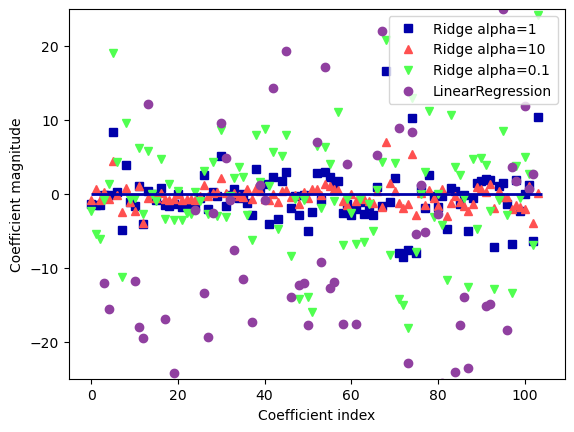

In [ ]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available.

/Users/yeabinmoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

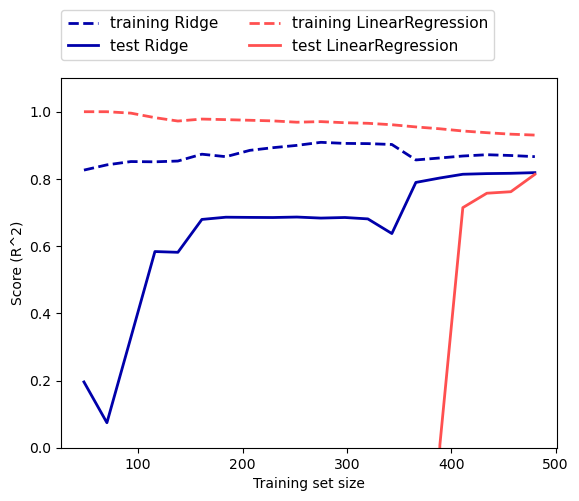

In [ ]:
mglearn.plots.plot_ridge_n_samples()

- The training score is higher than the test score for all dataset sizes, for both ridge and linear regression
- Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board
- However, the test score for ridge is better, particularly for small subsets of the data

For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance

## Lasso

An alternative to Ridge for regularizing linear regression is Lasso

- As with ridge regression, the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization
- The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero
    - some features are entirely ignored by the model.
    - a form of automatic feature selection

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


- As you can see, Lasso does quite badly, both on the training and the test set
    - underfitting?
- use only 4 features out of 104

Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero

    - default is 1.0

To reduce underfitting, let’s try decreasing alpha.

When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run):

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


- A lower alpha allowed us to fit a more complex model, which worked better on the training and test data.
- The performance is slightly better than using Ridge, and we are using only 33 of the 104 features.
- This makes this model potentially easier to understand.

If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression:

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

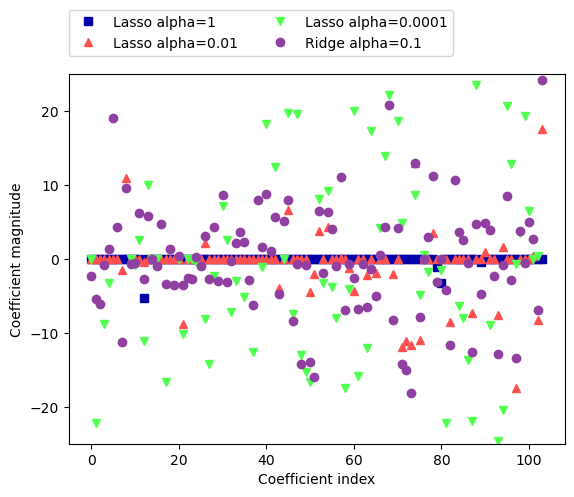

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- For alpha=1, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude.
- Decreasing alpha to 0.01, we obtain the solution shown as an upward pointing triangle, which causes most features to be exactly zero.
- Using alpha=0.0001, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude.
- For comparison, the best Ridge solution is shown as circles. The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

Let's review the following comments

- In practice, ridge regression is usually the first choice between these two models.
- However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.
- Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features.
- scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge.
- In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

Let's discuss the theoreis behind